## Questão 01

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt

import sklearn
from sklearn import datasets, linear_model, metrics
import numpy as np

## Questão 02

In [2]:
X, y = datasets.load_diabetes(return_X_y=True)

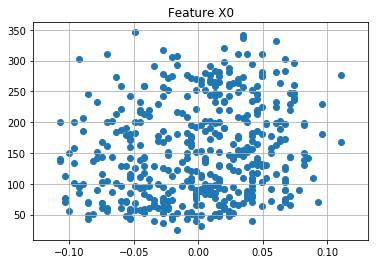

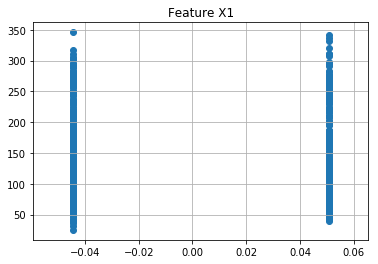

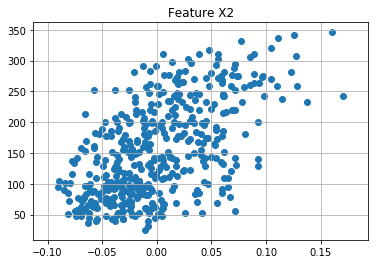

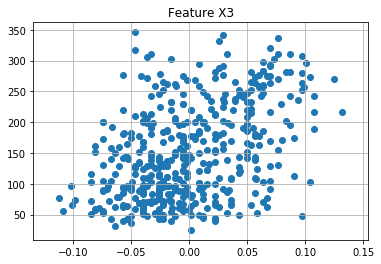

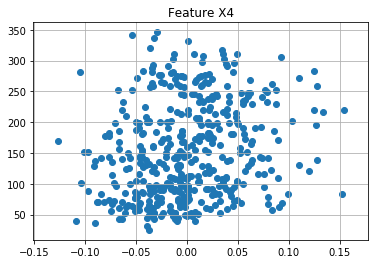

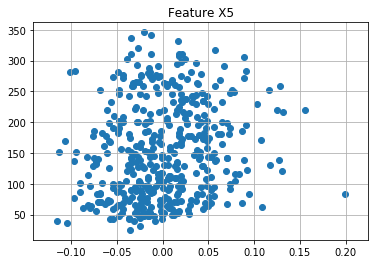

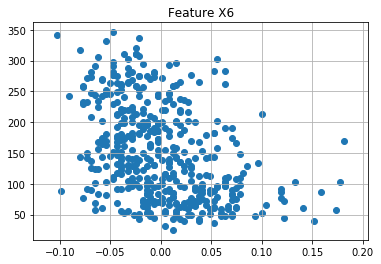

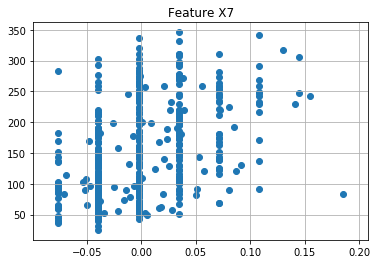

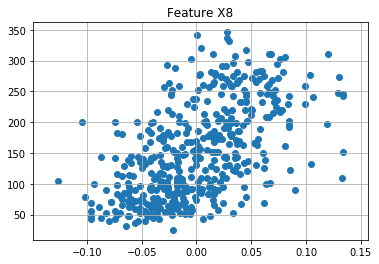

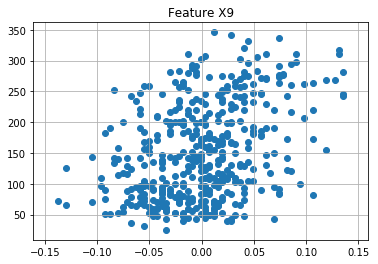

In [3]:
col = []
for i in range(0, len(X[0])) : #Percorrendo as colunas
    for j in range(0, len(X)) : #Percorrendo cada linha da estrutura
        col.append(X[j][i])
    plt.figure(i)
    plt.title("Feature X" + str(i))
    plt.grid()
    plt.scatter(col, y)
    del col[:]

#### A) Qual feature melhor se ajusta a uma função linear? Por que?
A feature X8 pois os dados estão crescentes e estão menos dispersos.

#### B) Qual feature pior se ajusta a uma função linear? Por que?
A feature X1, pois há muitos dados iguais e isso causa relações diferentes em Y.


## Questão 03

In [4]:
col = []
for i in range(0, len(X[0])) : #Percorrendo as colunas
    for j in range(0, len(X)) : #Percorrendo cada linha da estrutura
        col.append(X[j][i])
    print("Correlação: " + "X" + str(i))
    print(np.corrcoef(col, y)[0, 1])
    del col[:]

Correlação: X0
0.18788875071891983
Correlação: X1
0.04306199845160538
Correlação: X2
0.5864501344746886
Correlação: X3
0.44148384893088616
Correlação: X4
0.2120224810145507
Correlação: X5
0.17405358696874246
Correlação: X6
-0.39478925067091836
Correlação: X7
0.43045288474477306
Correlação: X8
0.5658834252428098
Correlação: X9
0.38248348424858103


## Questão 04

In [5]:
model = linear_model.LinearRegression()

In [6]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

## Questão 05

#### B0

In [12]:
b0 = model.intercept_

#### B1

In [13]:
b1= model.coef_

### Fórmula

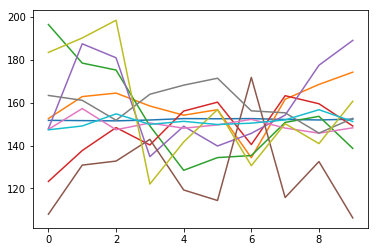

In [17]:
for i in range (0, X.shape[1]) :
    f = b1[i] * X[i] + b0
    plt.plot(f)
    plt.show

## Questão 06

In [7]:
y_pred = model.predict(X)
y_pred

array([206.11706979,  68.07234761, 176.88406035, 166.91796559,
       128.45984241, 106.34908972,  73.89417947, 118.85378669,
       158.81033076, 213.58408893,  97.07853583,  95.1016223 ,
       115.06673301, 164.67605023, 103.07517946, 177.17236996,
       211.75953205, 182.84424343, 147.99987605, 124.01702527,
       120.33094632,  85.80377894, 113.11286302, 252.44934852,
       165.48821056, 147.72187623,  97.12824075, 179.09342974,
       129.05497324, 184.78138552, 158.71515746,  69.47588393,
       261.50255826, 112.81897436,  78.37194762,  87.66624129,
       207.92460213, 157.87686037, 240.84370686, 136.93372685,
       153.48187659,  74.15703284, 145.63105805,  77.8280105 ,
       221.0786645 , 125.22224022, 142.60147066, 109.4926324 ,
        73.14037106, 189.87368742, 157.93636782, 169.55816531,
       134.18186217, 157.72356219, 139.1077439 ,  72.73252701,
       207.8289973 ,  80.10834588, 104.08562488, 134.57807971,
       114.23779529, 180.67760064,  61.12644508,  98.72

## Questão 07

### Cálculo usando scikit learn

In [8]:
mse = metrics.mean_squared_error(y,y_pred)
mse

2859.6903987680657

### Cálculo usando Python

In [9]:
mse_bracal = sum((y - y_pred) ** 2) / len(y)
mse_bracal

2859.6903987680653

## Questão 08

In [21]:
X8 = []
for i in range(0,len(X)) :
    item = [X[i][8]]
    X8.append(item)

In [22]:
modeloX8 = linear_model.LinearRegression()
modeloX8.fit(X8, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
print("Tamanho de " + str(len(X8)) + " linhas")

y_pred2  = modeloX8.predict(X8)
b1 = np.sum((X8 - np.mean(X8)) * (y_pred2 - np.mean(y_pred2))) / np.sum((X8 - np.mean(X8)) ** 2) 
print("B1 - Braçal")
print("Coeficiente angular: " + str(b1))

b0 = np.mean(y_pred2) - b1 * np.mean(X8)

print("B0 - Braçal")
print (b0)

Tamanho de 442 linhas
B1 - Braçal
Coeficiente angular: -2.2026824808560268e-13
B0 - Braçal
152.13348416289588


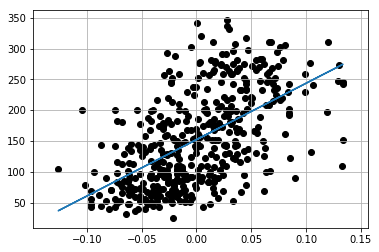

In [31]:
plt.grid()
plt.scatter(X8, y, color='black')
plt.plot(X8, y_pred2)

## Questão 09